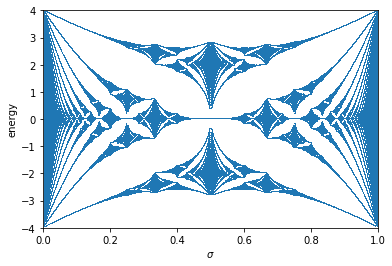

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import gcd
import scipy.linalg as lin

###############################################################################
# Needed functions


def V(m):
    ''' Function for getting the value of V '''
    v = 2*np.cos(2*np.pi*m*p/q)
    return v
###############################################################################

###############################################################################
# Odd part
qmax = 400

sigma = []
energy = []

for q in range(4, qmax + 1, 2):

    for p in range(1, q, 2):

        if gcd(p, q) <= 1:

            diag = []
            offdiag = np.ones(int(q/2 - 2))

            for m in range(1, int(q/2)):
                diag.append(V(m))

            a = np.diagflat(diag)
            np.fill_diagonal(a[1:], offdiag)
            np.fill_diagonal(a[:, 1:], offdiag)
            
            solve = lin.eig(a)
            solve = solve[0]
            solve = np.real(solve)
            
            s = np.array(np.ones(len(solve)))
            s = (p/q)*s
            
            sigma.append(s)
            energy.append(solve)

for i in range(len(sigma)):
    plt.plot(sigma[i], energy[i], ',', color='tab:blue')

plt.xlabel(r'$\sigma$')
plt.ylabel('energy')
plt.xlim(0, 1)
plt.ylim(-4, 4)
plt.show()
###############################################################################